In [2]:
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['delivery.csv']))

Saving delivery.csv to delivery.csv


In [3]:
df2.describe()


,n.prod,distance,delTime
count,25.000000,25.000000,25.000000
mean,8.760000,409.280000,22.384000
std,6.881618,325.188089,15.524903
min,2.000000,36.000000,8.000000
25%,4.000000,150.000000,13.750000
50%,7.000000,330.000000,18.110000
75%,10.000000,605.000000,21.500000
max,30.000000,1460.000000,79.240000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


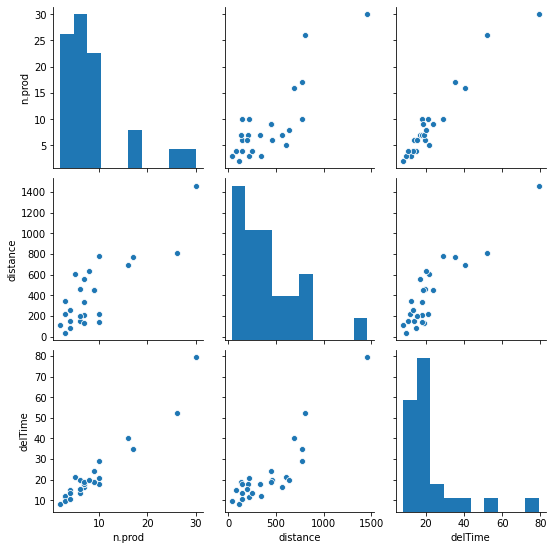

In [4]:
import seaborn as sns
sns.pairplot(df2)

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
x = df2[['n.prod', 'distance']]
y = df2['delTime']
regressor.fit(x,y)
print(regressor.intercept_, regressor.coef_)

2.3412311451922108 [1.61590721 0.01438483]


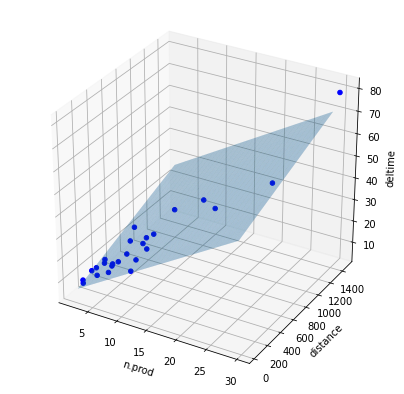

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=df2['n.prod'], ys=df2['distance'],zs=df2['delTime'],c='blue', alpha=1, marker='o')
ax.set_xlabel('n.prod')
ax.set_ylabel('distance')
ax.set_zlabel('deltime')
x_surf = np.arange(df2['n.prod'].min(), df2['n.prod'].max(), 1)
y_surf = np.arange(df2['distance'].min(), df2['distance'].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod' : x_surf.ravel(), 'distance' : y_surf.ravel()})
out = regressor.predict(X_mesh)
ax.plot_surface(x_surf, y_surf,
    out.reshape(x_surf.shape),
    rstride = 1,
    cstride = 1,
    alpha = 0.4
)